In [1]:
# Edited by Weiyang on 01/22/2019
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Define a function to calculate volume flux above the sill crest
def Vflux(filename, xloc):
        
    state0 = xr.open_dataset(filename)
    state = state0.isel(Y = range(1,10)) # Remove the boundary walls in y direction
    
    # Grid areas
    Area = np.empty([len(state.X), len(state.Y)])
    Area[:10,:] = 100
    Area[10:20,:] = 200
    Area[20:30,:] = 300
    Area[30:40,:] = 800
    Area[40:,:] = 1600
    
    Qnet = np.empty(len(state.T))
    Q_out = np.empty(len(state.T))
    Q_in = np.empty(len(state.T))
    for t in range(len(state.T)):
        u = state.U.isel(T = t).data
        u_ymean = (u[:, :, 1:] + u[:, :, :-1]) / 2
        u_x = u_ymean[:, :, xloc] # Profile at the selected x location
        Qx = u_x * Area
        Qnet[t] = Qx.sum()
        Q_in[t] = Qx[Qx < 0].sum()
        Q_out[t] = Qx[Qx > 0].sum()
    return (Qnet, Q_out, Q_in)
# TEST
#u_x, Qnet, Q_out, Q_in = Vflux('/work/oceans/wbao/MITgcm_results/iceplume/sill30/state_002.nc', 28)
#Q = u_x[:10,:]*100 + u_x[10:20,:]*200 + u_x[20:30,:]*300 + u_x[30:40,:]*800 + u_x[40:,:]*1600
#Q.sum(),Qnet[-1]

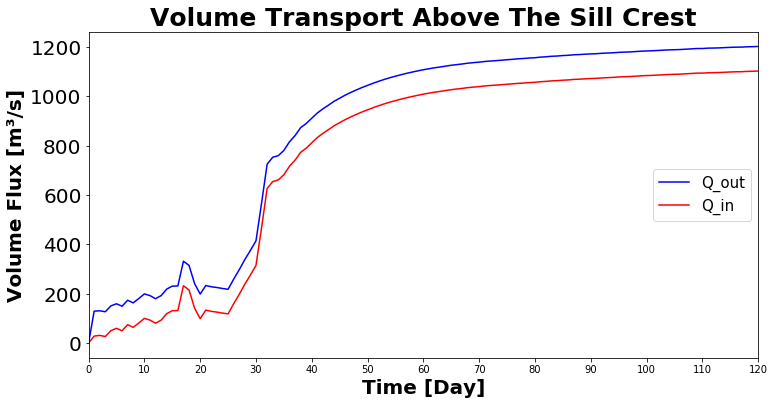

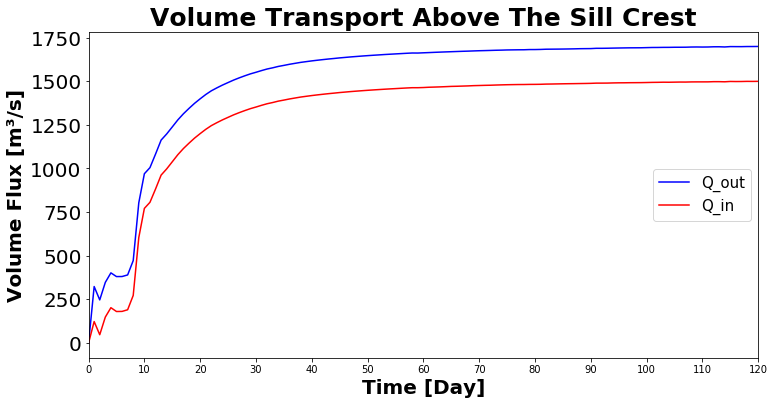

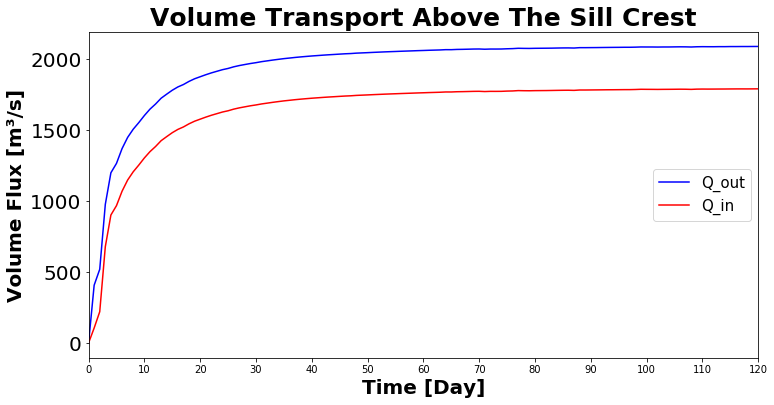

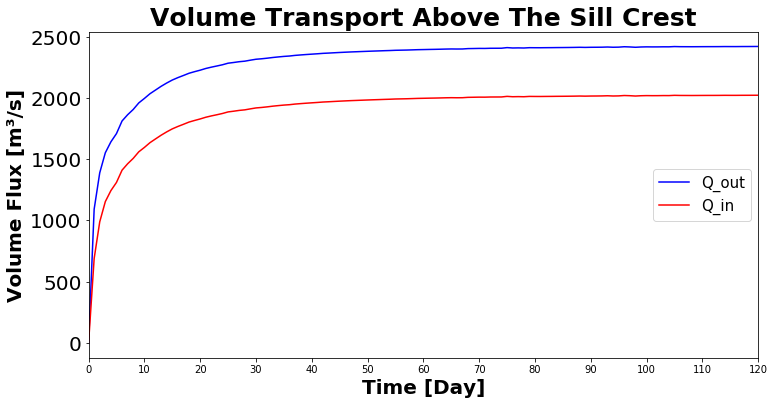

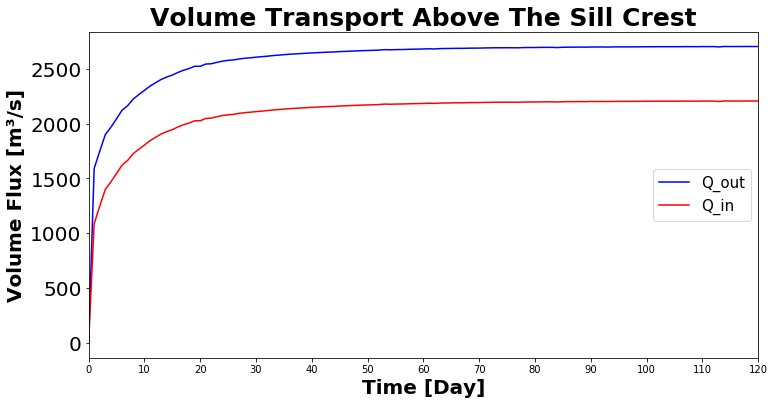

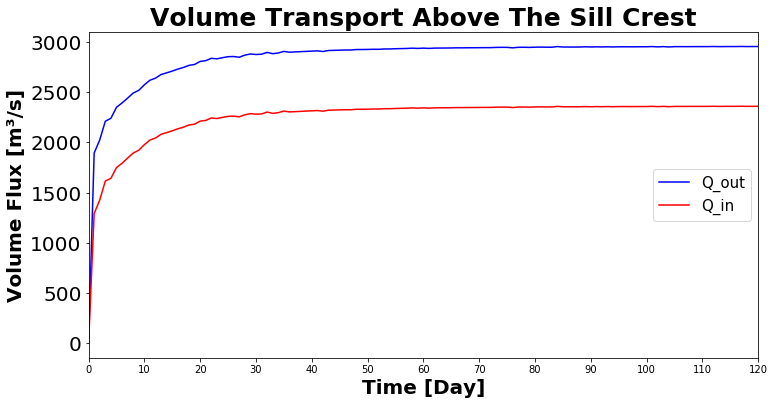

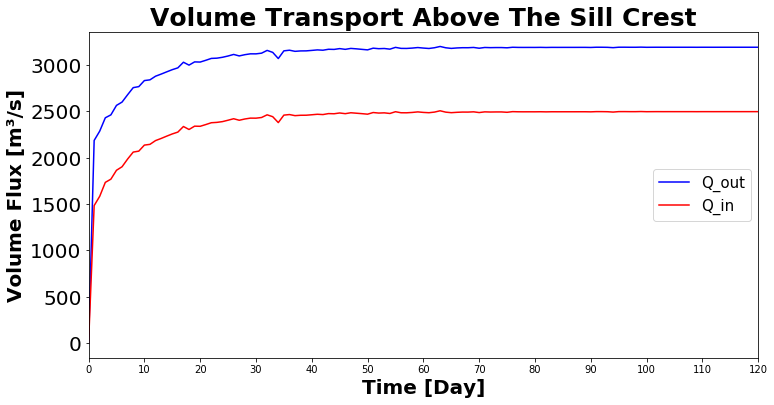

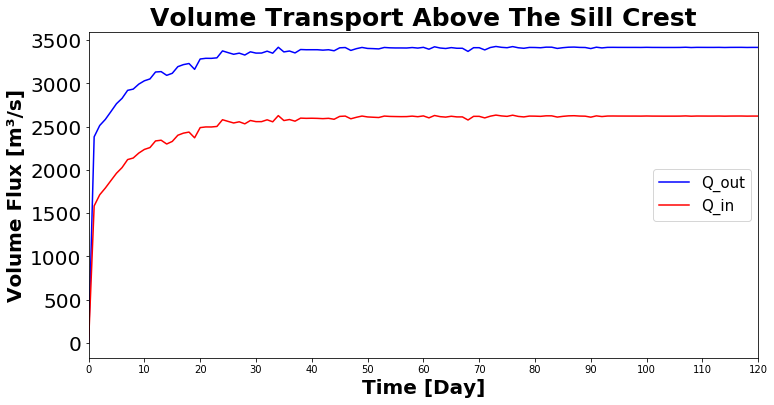

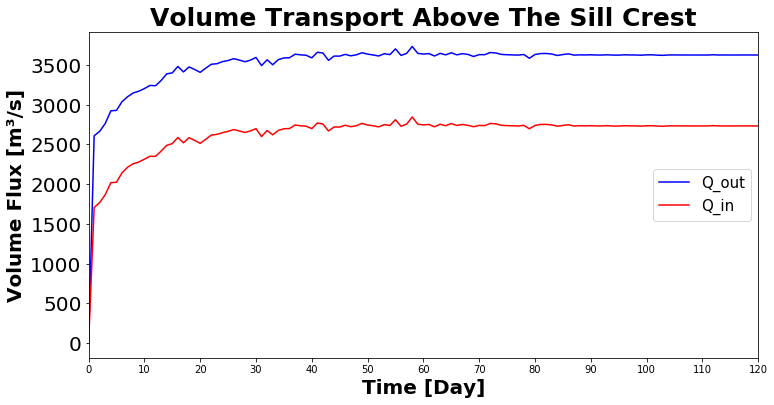

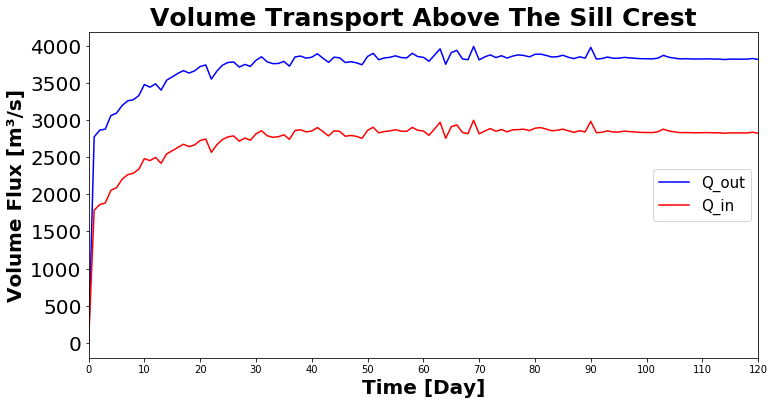

In [3]:
fig_path = "/Users/weiyangbao/Documents/Jupyter_Figs//Sill012/Vol_flux"
#fig_path = "/home/1959/Jupyter_Figs/sill60/Vol_flux/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)
    
import glob
files = sorted(glob.glob('/Users/weiyangbao/Documents/Model_outputs/drag_010/state*.nc'))

xloc = 27
sill_depth = 15

for i in range(len(files)):
    
    Qnet, Q_out, Q_in = Vflux(files[i], xloc)

    fig, ax =plt.subplots(figsize=(12,6))
    ax.set_xlim([0,120])
    ax.set_xticks(np.linspace(0,120,13))
    #ax.set_xticklabels(np.linspace(0,120,13, dtype = int), size = 20)
    #ax.set_ylim([0,4000])
    #ax.set_yticks(np.linspace(0,4000,9))
    #ax.set_yticklabels(np.linspace(0,4000,9, dtype = int), size = 20)
    plt.yticks(fontsize = 20)
    plt.xlabel("Time [Day]", size = 20, weight = 'bold')
    plt.ylabel("Volume Flux [m\u00B3/s]", size = 20, weight = 'bold')
    plt.plot(Q_out, "b-", linewidth=1.5, label='Q_out')
    plt.plot(-Q_in, "r-", linewidth=1.5, label='Q_in')
    plt.legend(loc = 'right', fontsize = 15)
    #plt.text(0, 3800, r'$sill$ $depth$: ' + str(sill_depth) + ' $m$', {'color': 'C2','fontsize': 15})
    #plt.text(0, 3500, r'$Q_{sg}$: ' + str(100*(i+1)) + ' $m\u00B3/s$', {'color': 'C2','fontsize': 15})
    plt.title("Volume Transport Above The Sill Crest", size = 25, weight = 'bold')
    #plt.close()
    #fig.savefig(fig_path + '/Qf_' + format(100*(i+1), '04d') + '.png', dpi = 150, bbox_inches='tight')

In [4]:
files

['/Users/weiyangbao/Documents/Model_outputs/drag_010/state_001.nc',
 '/Users/weiyangbao/Documents/Model_outputs/drag_010/state_002.nc',
 '/Users/weiyangbao/Documents/Model_outputs/drag_010/state_003.nc',
 '/Users/weiyangbao/Documents/Model_outputs/drag_010/state_004.nc',
 '/Users/weiyangbao/Documents/Model_outputs/drag_010/state_005.nc',
 '/Users/weiyangbao/Documents/Model_outputs/drag_010/state_006.nc',
 '/Users/weiyangbao/Documents/Model_outputs/drag_010/state_007.nc',
 '/Users/weiyangbao/Documents/Model_outputs/drag_010/state_008.nc',
 '/Users/weiyangbao/Documents/Model_outputs/drag_010/state_009.nc',
 '/Users/weiyangbao/Documents/Model_outputs/drag_010/state_010.nc']